# Capstone Project for Analytics system technology(Classification)

## Introduction: We are going to predict whether a person with certain features is having a heart disease or not
The dataset contains the following features:
1. age(in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0 

Hypothesis: Person having a heart disease is dependant on the above mentioned clinical signals and results of few medical tests.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns

## Reading the excel and printing the head of the table

In [36]:
input_raw=pd.read_excel("heart.xlsx")
input_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
input_raw.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Correlation between different numerical columns

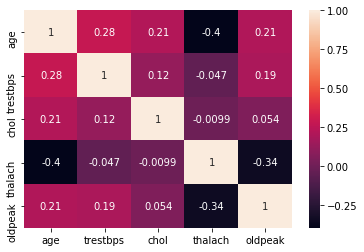

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


In [13]:
num=['age','trestbps','chol','thalach','oldpeak']
cat=['sex','cp','fbs','restecg','exang','slope','ca','thal']
sns.heatmap(input_raw[num].corr(),annot=True)
plt.show()
input_raw[num].corr()

## Target variable vs Different categorical variables

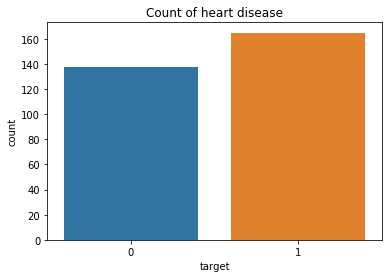

In [49]:
sns.countplot(x='target', data=input_raw)
plt.title("Count of heart disease")
plt.show()

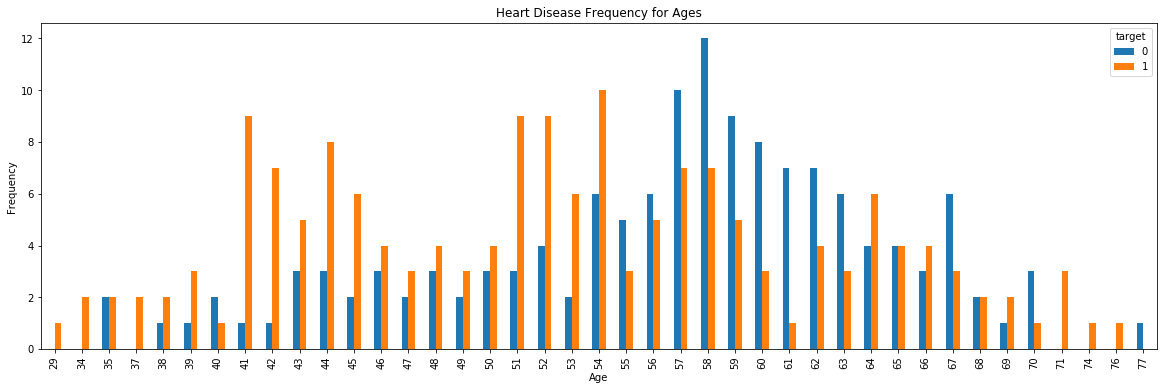

In [117]:
pd.crosstab(input_raw.age,input_raw.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

From the above table we can say that probability of having heart attack is more for people with age less than 50.

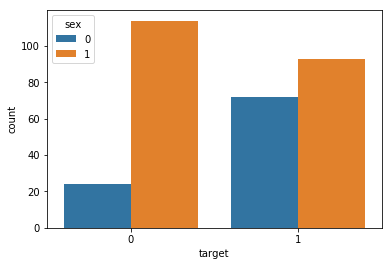

In [51]:
sns.countplot(x='target', data=input_raw, hue='sex')

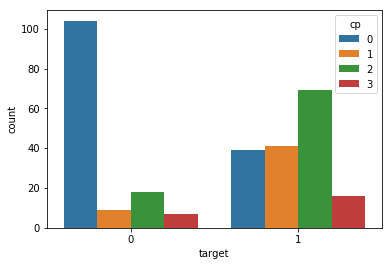

In [53]:
sns.countplot(x='target', data=input_raw, hue='cp')
cat=['sex','cp','fbs','restecg','exang','slope','ca','thal']

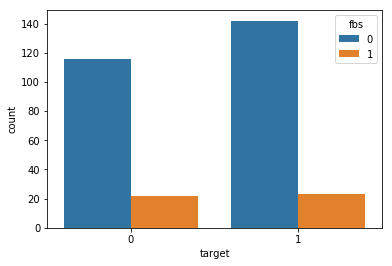

In [54]:
sns.countplot(x='target', data=input_raw, hue='fbs')


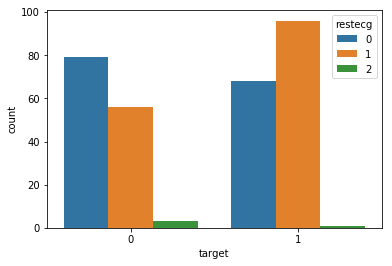

In [55]:
sns.countplot(x='target', data=input_raw, hue='restecg')

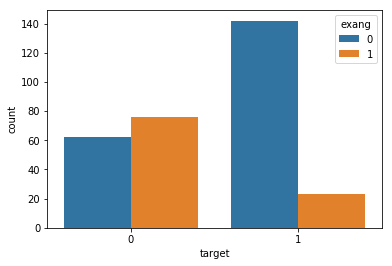

In [57]:
sns.countplot(x='target', data=input_raw, hue='exang')

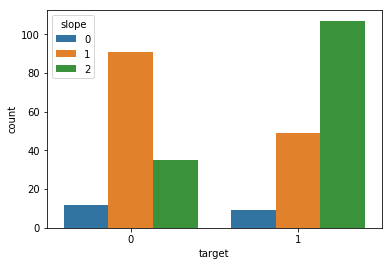

In [60]:
sns.countplot(x='target', data=input_raw, hue='slope')

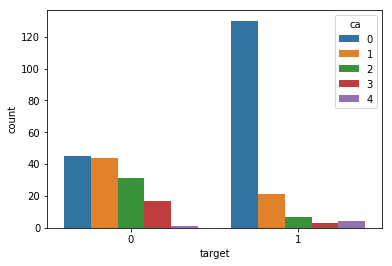

In [61]:
sns.countplot(x='target', data=input_raw, hue='ca')

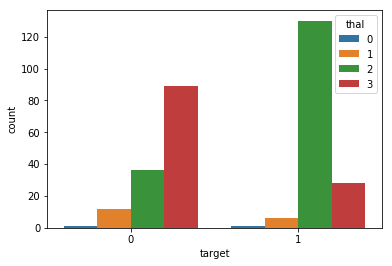

In [62]:
sns.countplot(x='target', data=input_raw, hue='thal')

## Box plots of different numerical features by target variable

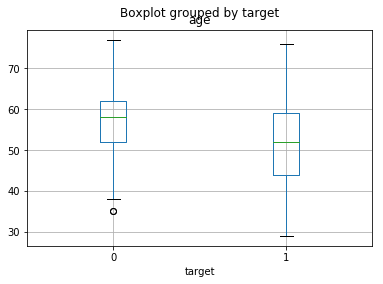

In [63]:
input_raw.boxplot('age',by='target')

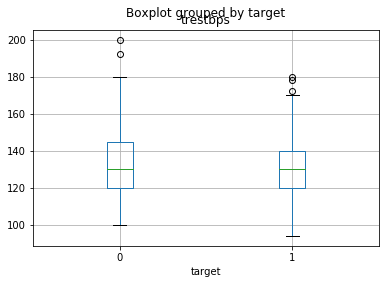

In [64]:
input_raw.boxplot('trestbps',by='target')

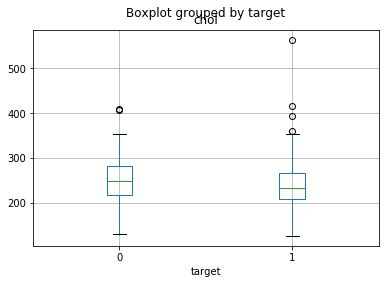

In [65]:
input_raw.boxplot('chol',by='target')

It can be clearly seen that the people with lower cholestrol are prone to heart disease than higher cholestrol, which is contradicting the nature.

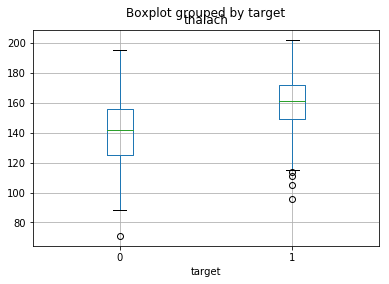

In [66]:
input_raw.boxplot('thalach',by='target')

From the above boxplot, we can say people with higher thalach i.e. higher maximum heart rate are prone to heart disease than rest.

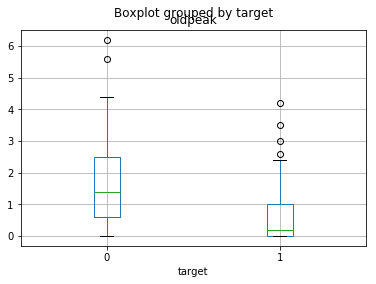

In [67]:
input_raw.boxplot('oldpeak',by='target')

## Preparing the train test data using train_test_split with test size as 80 percent

In [37]:
X_train, X_test, y_train, y_test = train_test_split(input_raw.loc[:,input_raw.columns!='target'], input_raw['target'], 
                                                    test_size=0.2)

## Initialising random forests parameters

In [38]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(50,400,50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [4,6,8,10,12,14]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

## Creating random_grid to search for the best parameters using RandomizedSearchCV

In [23]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   32.2s finished
C:\Users\nkuma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250, 300, 350], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 6, 8, 10, 12, 14, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

## Creating the model with the best parameters

In [115]:
rf1=RandomForestClassifier(n_estimators= 200, min_samples_split= 5,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 6,
 bootstrap= True)
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Creating the confusion matrix and calculating the accuracy of the model

In [150]:
predictions=rf1.predict(X_test)
from sklearn.metrics import confusion_matrix

conf_mat_train = confusion_matrix(y_train, rf1.predict(X_train))
conf_mat_train=pd.DataFrame({"Yes":conf_mat_train[0],'No':conf_mat_train[1]},index=['yes','No'])
conf_mat_train

,Yes,No
yes,102,3
No,8,129


In [147]:
print("The accuracy for test set is ",(y_test==rf1.predict(X_test)).sum()/len(y_test))

The accuracy for test set is  0.819672131147541


In [149]:
conf_mat_test = confusion_matrix(y_test, predictions)
conf_mat_test=pd.DataFrame({"Yes":conf_mat_test[0],'No':conf_mat_test[1]},index=['yes','No'])
conf_mat_test

,Yes,No
yes,22,5
No,6,28


In [148]:
print("The accuracy for training set is ",(y_train==rf1.predict(X_train)).sum()/len(y_train))

The accuracy for training set is  0.9545454545454546
